In [1]:
import cv2
import numpy as np

originalImage = cv2.imread('MRI-Head.png',0)

In [6]:
vidcap = cv2.VideoCapture('MRI.avi')
success,image = vidcap.read()
count = 0

cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      

True

In [7]:
originalImage.shape

(256, 256)

In [8]:
originalImage = originalImage.reshape(256,256,1)
cv2.imshow('Original Image',originalImage)
cv2.waitKey()

-1

In [9]:
noise1 = originalImage - image

In [10]:
cv2.imshow('Noise 1',noise1)
cv2.waitKey()

-1

In [28]:
cv2.imwrite("noise.jpg" , noise1) 

True

In [11]:
noise1 = noise1.astype(np.int32)
print(" Mean of noise : " + str(noise1.mean()) +" standard deviation of noise : "+ str(noise1.std()) )


 Mean of noise : 108.14817810058594 standard deviation of noise : 121.03669989550787


In [2]:
vidcap = cv2.VideoCapture('MRI.avi')
i=0
averagFrame = 0
while(vidcap.isOpened()):
    ret, frame = vidcap.read()
    if ret == False:
        break
    averagFrame += frame/500   # 500 is the number of total frames 
    i+=1

vidcap.release()
cv2.destroyAllWindows()

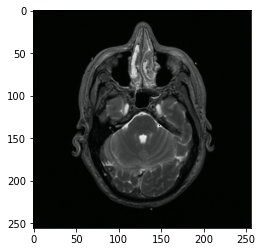

In [5]:
averagFrame = averagFrame.astype(np.int32)
cv2.imshow('Average Frame',averagFrame)
cv2.waitKey()

'''
#if it doesn't work use this code :

import matplotlib.pyplot as plt

plt.imshow(averagFrame.astype(np.int32))
''''''

In [12]:
noise2 = originalImage - averagFrame
print(" Mean of noise2 : " + str(noise2.mean()) +" standard deviation of noise : "+ str(noise2.std()) )

 Mean of noise2 : -0.19528957112629586 standard deviation of noise : 2.8246872952252113


In [13]:
img = cv2.imread('averagFrame.jpg',0)
mask = cv2.imread('mask.png',0).reshape(img.shape)
maskedImage = cv2.bitwise_and(img,img,mask = mask)

In [14]:
cv2.imshow('Masked Image',maskedImage)
cv2.waitKey()

-1